In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
df=pd.read_csv('house.csv')


In [5]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21613, 21)

In [10]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [12]:
df['id'].value_counts()[0:10]

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
1954420170    2
6381500170    2
7167000040    2
9407110710    2
1000102       2
Name: id, dtype: int64

In [16]:
list(df['grade'].value_counts()[0:5].keys())

[7, 8, 9, 6, 10]

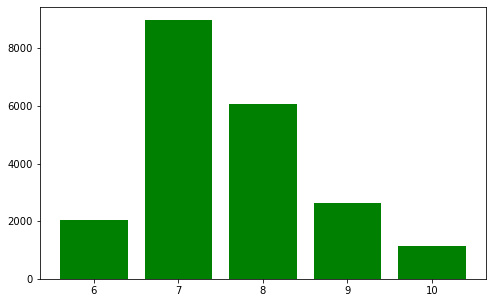

In [20]:
plt.figure(figsize=(8,5))
plt.bar(list(df['grade'].value_counts()[0:5].keys()),list(df['grade'].value_counts()[0:5]),color= "g")
plt.show()

In [22]:
x=df[['sqft_living']].values

In [23]:
y=df['price'].values

Text(0.5, 1.0, 'scatter plot')

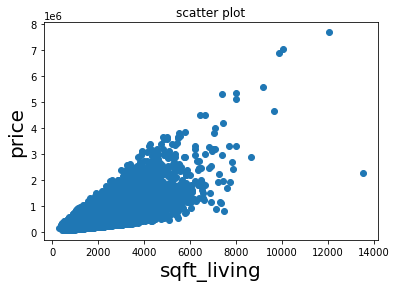

In [24]:
plt.scatter(x,y)
plt.xlabel('sqft_living',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.title('scatter plot')

Text(0.5, 0, 'sqft_living')

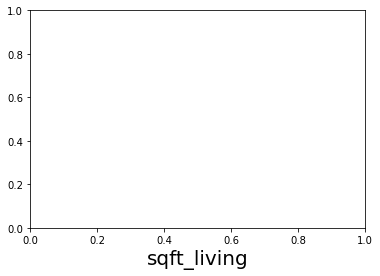

In [25]:
plt.xlabel('sqft_living',fontsize=20)

Text(0, 0.5, 'price')

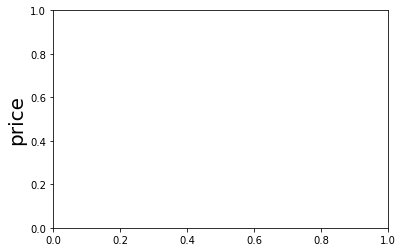

In [19]:
plt.ylabel('price',fontsize=20)

Text(0.5, 1.0, 'scatter plot')

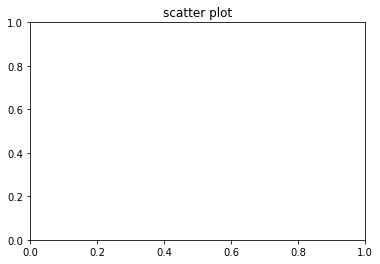

In [28]:
plt.title('scatter plot')

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [39]:
Ir=LinearRegression()
model=Ir.fit(x_train,y_train)
print('the coefficient for this model is ',model.coef_)
y_train_pred=model.predict(x_train)
mse_train=mean_squared_error(y_train,y_train_pred)
y_test_pred=model.predict(x_test)
mse_test=mean_squared_error(y_test,y_test_pred)

the coefficient for this model is  [280.43614282]


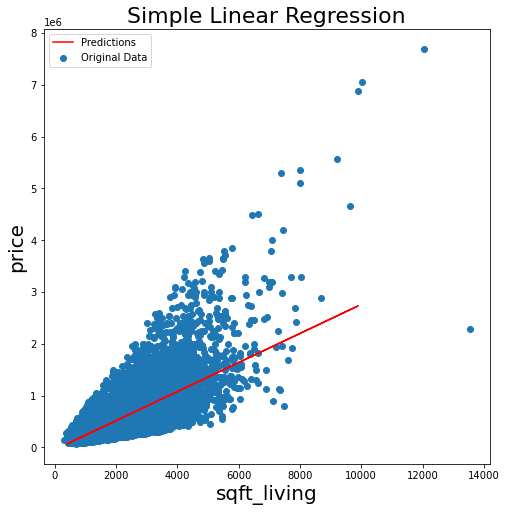

In [42]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(x,y,label='Original Data')
plt.plot(x_test,y_test_pred,color='red',label='Predictions')
plt.xlabel('sqft_living', fontsize=20)
plt.ylabel('price' ,fontsize=20)
plt.title('Simple Linear Regression',fontsize=22)
ax.legend()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('Housing.csv')
df_copy = df.copy(deep=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
//Changing yes/no values to 1/0

In [9]:
cat_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea']

def binary_mapping(x):
  return x.map({'yes': 1, "no": 0})

df[cat_columns] = df[cat_columns].apply(binary_mapping)

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [11]:
ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['furnishingstatus']]))

ohe_df.columns = ohe.get_feature_names(['status'])

ohe_df.head()

,status_semi-furnished,status_unfurnished
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0


In [12]:
df = pd.concat([df,ohe_df], axis=1)
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_semi-furnished,status_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0


In [ ]:
//Data Visualization

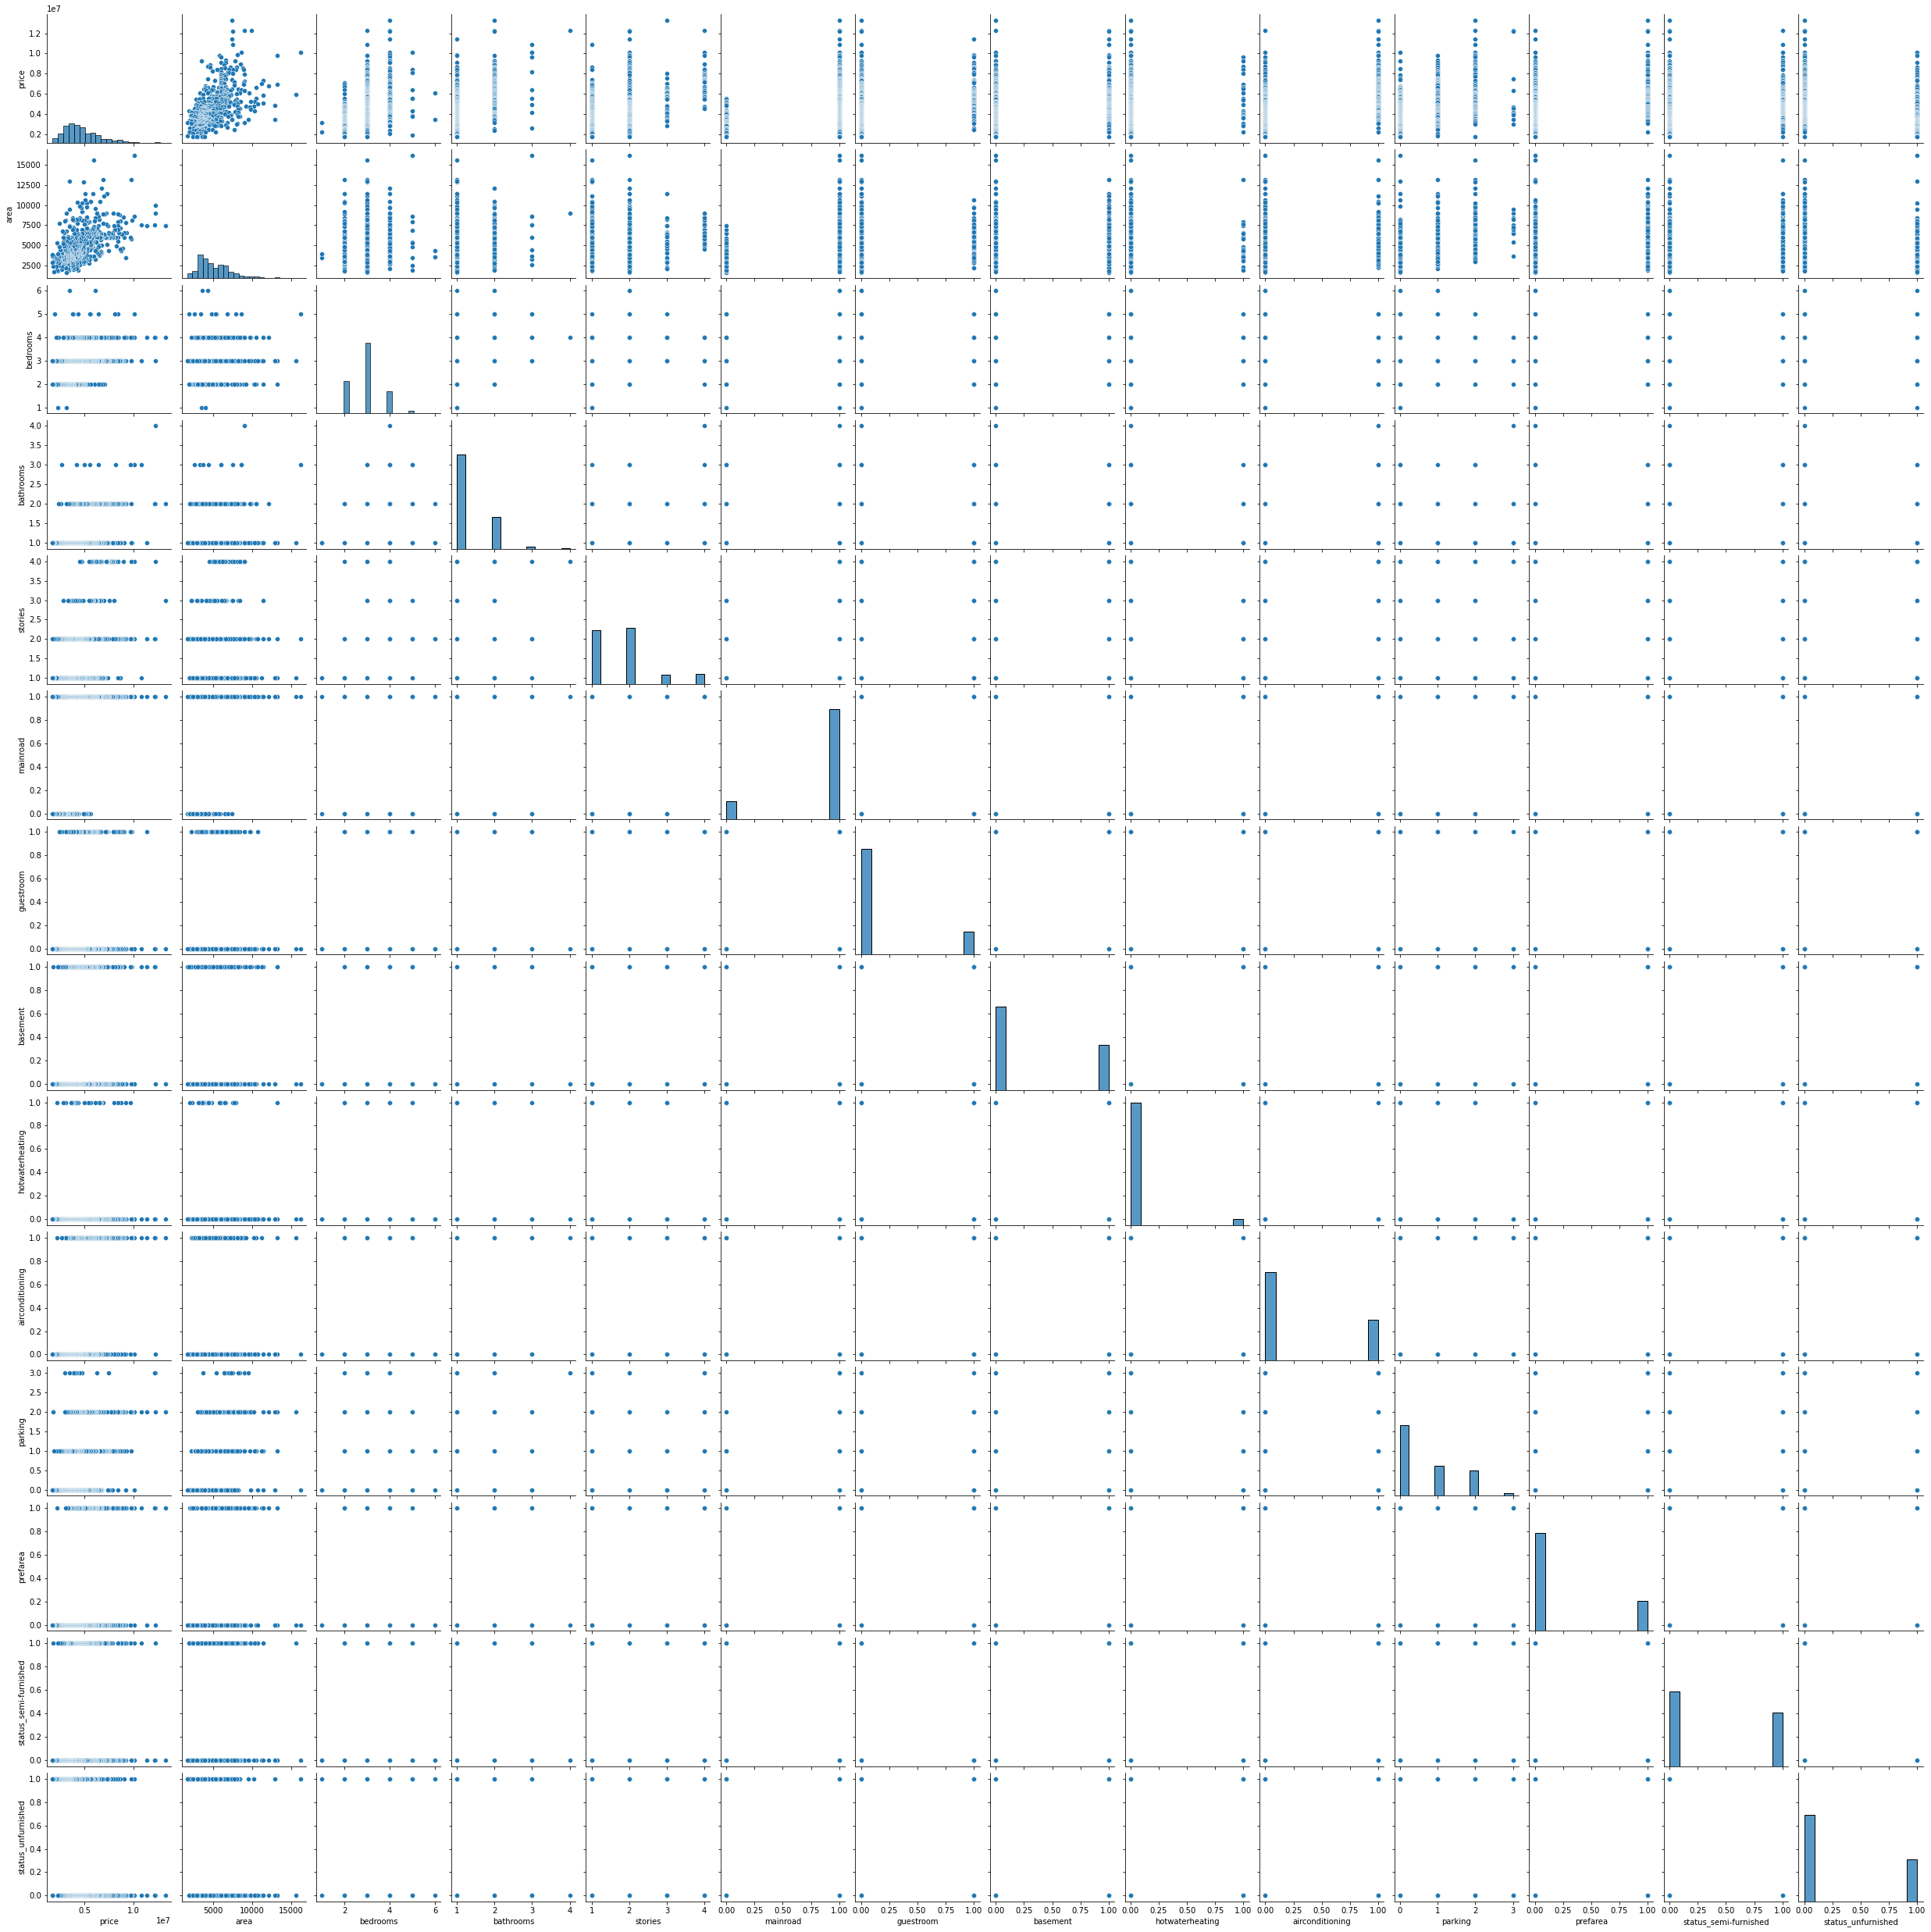

In [13]:
sns.pairplot(df)  
plt.show()

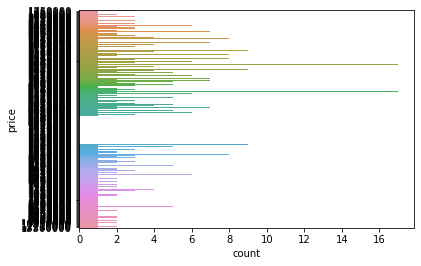

In [14]:
sns.countplot(y='price', data=df_copy)
plt.show()

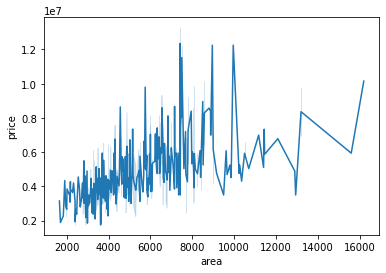

In [15]:
sns.lineplot(x='area', y='price', data=df_copy)
plt.show()

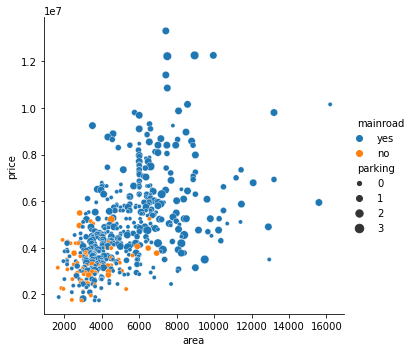

In [16]:
sns.relplot(x='area',y='price',hue='mainroad',size='parking',data=df_copy)

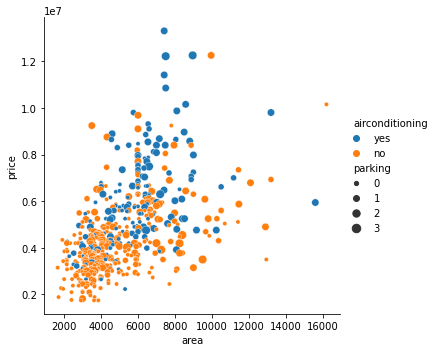

In [17]:
sns.relplot(x='area',y='price',hue='airconditioning',size='parking',data=df_copy)

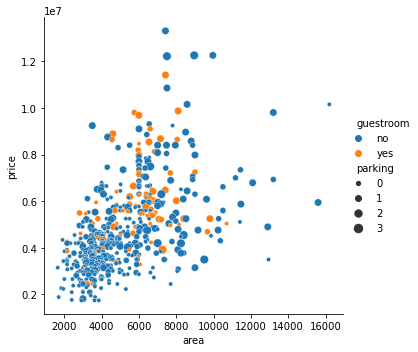

In [18]:
sns.relplot(x='area',y='price',hue='guestroom',size='parking',data=df_copy)

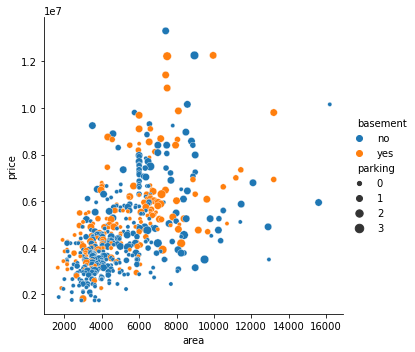

In [19]:
sns.relplot(x='area',y='price',hue='basement',size='parking',data=df_copy)

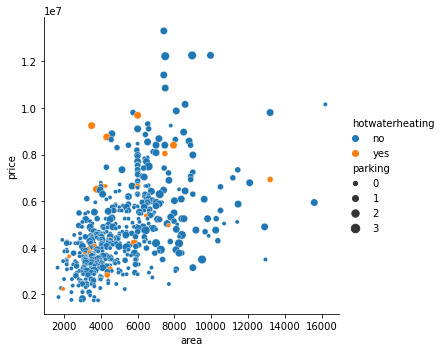

In [20]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

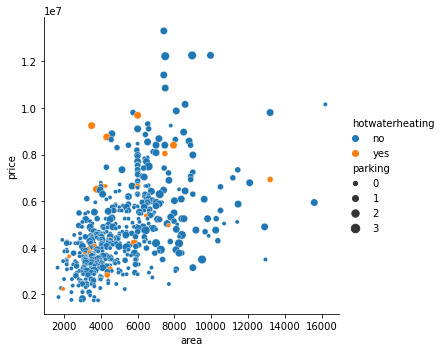

In [21]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

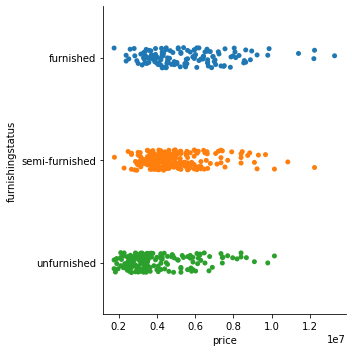

In [22]:
sns.catplot(x='price', y='furnishingstatus', data=df_copy)

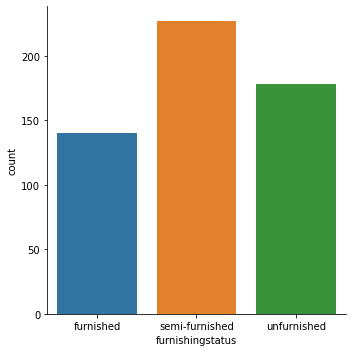

In [23]:
sns.catplot(x='furnishingstatus',kind='count',data=df_copy ,orient='h')

In [ ]:
// Model Fitting

In [24]:
df_new = df.copy(deep=True)
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

df_new[num_columns] = MinMaxScaler().fit_transform(df_new[num_columns])

df_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,status_semi-furnished,status_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0.0,0.0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0.0,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1.0,0.0
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0.0,0.0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0.0,0.0


In [25]:
y = df_new.pop('price')
x = df_new

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
model.coef_

array([3489014.70667712,  358881.43099087, 3372187.31277726,
       1159280.17187478,  372650.91306051,  270917.18289615,
        401008.77558814,  691330.60646909,  768994.68598486,
        776644.00229882,  627423.31246911, -177801.37946355,
       -412019.55299709])

In [30]:
model.intercept_

2251647.5139513314

In [31]:
y_pred = model.predict(x_test)

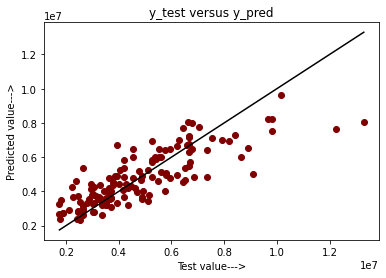

In [32]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.show()

In [33]:
per_error = 100*(y_pred-y_test)/y_test

df_prd_tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})
df_prd_tst.to_csv('prediction.csv')

In [34]:
df_prd_tst

,Predicted Price,Actual Price,% Error
316,5244464,4060000,29.173993
77,7224189,6650000,8.634433
360,3091382,3710000,-16.674314
90,4548783,6440000,-29.366713
493,3321777,2800000,18.634894
...,...,...,...
172,6946979,5250000,32.323426
124,6479074,5950000,8.892012
388,3221847,3500000,-7.947205
521,2387396,2408000,-0.855607


In [35]:
df_prd_tst.to_csv('Predictions.csv')

In [36]:
abs(per_error).max()

101.63319809354009

In [37]:
abs(per_error).min()

0.22212193535029656

In [38]:
abs(per_error).mean()

20.882962909042554

In [39]:
mean_squared_error(y_test, y_pred, squared = False)

1245949.1294090007

In [40]:
r2_score(y_test, y_pred)

0.6631280462200981

In [3]:
home=pd.read_csv('home.csv')

In [4]:
home.head(5)

,house_no,total_sqft,room,bedroom,kichan,bathroom,prices
0,1,1000,4,2,1,2,32lk
1,2,900,3,1,1,1,28lk
2,3,800,3,1,1,1,26lk
3,4,1200,4,2,1,2,34lk
4,5,1400,5,2,1,2,36lk


In [5]:
home.shape

(20, 7)

In [6]:
home['prices'].value_counts()

26lk    2
20lk    2
40lk    2
24lk    2
32lk    1
28lk    1
34lk    1
36lk    1
38lk    1
21lk    1
35lk    1
22lk    1
45lk    1
33lk    1
50lk    1
55lk    1
Name: prices, dtype: int64

In [7]:
home['prices'].value_counts()[0:6]

26lk    2
20lk    2
40lk    2
24lk    2
32lk    1
28lk    1
Name: prices, dtype: int64

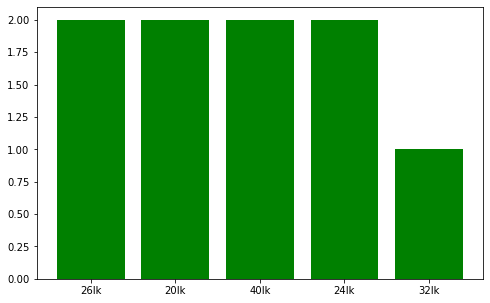

In [8]:
plt.figure(figsize=(8,5))
plt.bar(list(home['prices'].value_counts()[0:5].keys()),list(home['prices'].value_counts()[0:5]),color= ["blue","yellow","purple","red","black"]
plt.show()

In [9]:
home['total_sqft'].value_counts()

1000    2
900     2
1800    2
780     2
800     1
1200    1
1400    1
600     1
1250    1
550     1
1700    1
450     1
880     1
1100    1
2000    1
2200    1
Name: total_sqft, dtype: int64

In [10]:
home['total_sqft'].value_counts()[0:5]

1000    2
900     2
1800    2
780     2
800     1
Name: total_sqft, dtype: int64

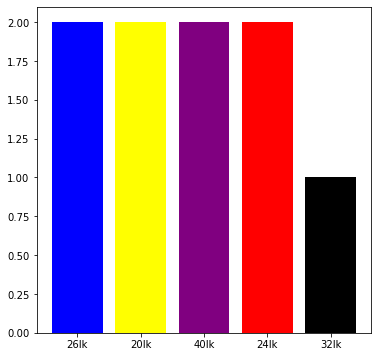

In [18]:
plt.figure(figsize=(6,6))
plt.bar(list(home['prices'].value_counts()[0:5].keys()),list(home['prices'].value_counts()[0:5]),color= ["blue","yellow","purple","red","black"])
plt.show()


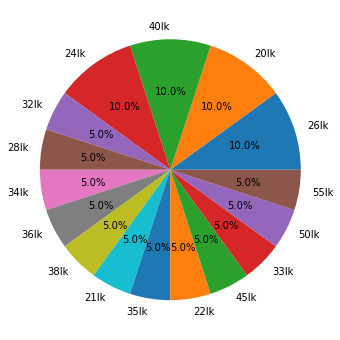

In [19]:
plt.figure(figsize=(6,6))
plt.pie(list(home['prices'].value_counts()),labels=list(home['prices'].value_counts().keys()),autopct='%0.1f%%' )
plt.show()